In [1]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_608/3103859701.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [7]:
Ns = [2**i for i in range(17)]

In [8]:
!mkdir tmp
for N in Ns:
    !g++ -O3 -march=native simd.cc -o simd -std=c++20 -lbenchmark_main -lbenchmark -lpthread
    !simd {N} --benchmark_out=tmp/{N}.json --benchmark_out_format=json


mkdir: cannot create directory ‘tmp’: File exists
2022-10-24T19:31:18+08:00
Running simd
Run on (16 X 3293.68 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x8)
  L1 Instruction 32 KiB (x8)
  L2 Unified 512 KiB (x8)
  L3 Unified 16384 KiB (x1)
Load Average: 0.18, 0.17, 0.10
-----------------------------------------------------
Benchmark           Time             CPU   Iterations
-----------------------------------------------------
FastL2Sqr        51.6 ns         51.6 ns     13647752
FaissL2Sqr       79.7 ns         79.7 ns      8862723
HNSWL2Sqr        80.4 ns         80.4 ns      8431906
2022-10-24T19:31:21+08:00
Running simd
Run on (16 X 3293.68 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x8)
  L1 Instruction 32 KiB (x8)
  L2 Unified 512 KiB (x8)
  L3 Unified 16384 KiB (x1)
Load Average: 0.25, 0.18, 0.11
-----------------------------------------------------
Benchmark           Time             CPU   Iterations
-----------------------------------------------------
FastL2Sqr        51.8 ns  

In [9]:
mp = defaultdict(list)
for N in Ns:
    json_file = f'tmp/{N}.json'
    with open(json_file, 'r') as fp:
        stat = json.load(fp)
        for benchmark in stat['benchmarks']:
            name = benchmark['name']
            cpu_time = benchmark['cpu_time']
            mp[name].append(cpu_time)


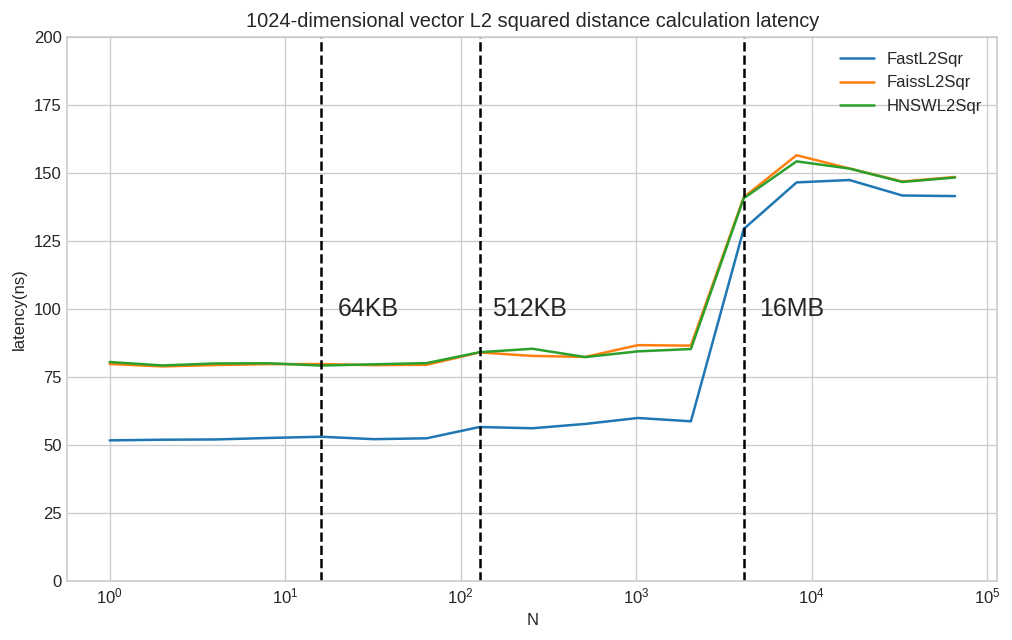

In [45]:
plt.figure(figsize=(10, 6), dpi=120)
for name, times in mp.items():
  plt.plot(Ns, times, label=name)
plt.title("1024-dimensional vector L2 squared distance calculation latency")
plt.xlabel('N')
plt.ylabel('latency(ns)')
plt.xscale('log')
plt.ylim(0, 200)
plt.vlines(x=4096, ymin=0, ymax=200, color='black', linestyle='--')
plt.text(5000, 100, "16MB", verticalalignment='center', fontsize=15)
plt.vlines(x=128, ymin=0, ymax=200, color='black', linestyle='--')
plt.text(150, 100, "512KB", verticalalignment='center', fontsize=15)
plt.vlines(x=16, ymin=0, ymax=200, color='black', linestyle='--')
plt.text(20, 100, "64KB", verticalalignment='center', fontsize=15)
plt.legend()